# simSPI Dataset Generation

The goal of this notebook is to:

- Showcase the simulation of target cryoEM datasets of choice
- Utilize the TEM wrapper and associated functions to do so

Workflow:

1) Configure and define inputs in `.yaml` files

2) Pass into TEM simulator

## Pre-requisites
- Installation of TEM-simulator 1.3  (installation documentation found here: https://tem-simulator.sourceforge.net)
- Installation of ioSPI and simSPI and are on the same level
- Relevant libraries (conda activate recommended, alternatively see requirements.txt)

## TEM-Simulator

TEM-simulator is an open source program designed to simulate and produce transmission electron microscope images for the purpose of testing and evaluating reconstruction methods. These datasets are reproducible using generated metadata. Originally written in C, compSPI wraps it in an easily accessible Python package for usage in tandem with your reconstruction method of choice.

#### 1. Change working directory to match compSPI structure
Only run the cell below once upon kernel restart.

In [1]:
import os
root = os.path.dirname(os.path.dirname(os.getcwd()))
os.chdir(root)
print(root)

/Users/jed/Documents/School/ENPH459


#### 2. Import requisite packages

In [2]:
import numpy as np
import starfile as sf

from matplotlib import pyplot as plt

from simSPI.simSPI import tem
from ioSPI.ioSPI import particle_metadata

#### 3. Inputs
To generate images the user is required to define a pair of `.yaml` files. These files define important fields such as characteristic dataset features or path configurations to save certain output files.

- `path_config.yaml`
    - `pdb_file` : path to the `.pdb` file for the structure the user wishes to generate.
    - `output_dir` : path to output directory where metadata files are outputted.
    - `local_sim_dir` : path to local installation of TEM simulator

- `sim_config.yaml`
    - `molecular_model`
        - `voxel_size_nm` - [nm]
        - `particle_name` - name of the particle
        - `particle_mrcout` - volume map of sample is written

    - `specimen_grid_params`
        - `hole_diameter_nm` - [nm]
        - `hole_thickness_center_nm` - [nm]
        - `hole_thickness_edge_nm` - [nm]

    - `beam_parameters`
        - `voltage_kv:` - [kV]
        - `energy_spread_v` - [V]
        - `electron_dose_e_per_nm2` - [e/nm**2] dose per image
        - `electron_dose_std_e_per_nm2` - standard deviation of dose per image

    - `optics_parameters`
        - `magnification` 
        - `spherical_aberration_mm` - [mm]
        - `chromatic_aberration_mm` - [mm]
        - `aperture_diameter_um` - [um] in back focal plane
        - `focal_length_mm` - [mm]
        - `aperture_angle_mrad` - [mrad] of the condenser lens
        - `defocus_um` - [um]
        - `defocus_syst_error_um` - [um]
        - `defocus_nonsyst_error_um` - [um]
        - `optics_defocusout` - file to write defocus values

    - `detector_parameters`
        - `detector_nx_px` - number of pixels along X axis
        - `detector_ny_px` - number of pixels along Y axis
        - `detector_pixel_size_um` - [um]
        - `average_gain_count_per_electron` - average number of counts per electron
        - `noise` - [bool] whether quantized electron waves result in noise
        - `detector_q_efficiency` - detector quantum efficiency $0 < e < 1$
        - `mtf_params` - `[0,0,1,0,0]` is perfect detector.

    - `miscellaneous`
        - `signal_to_noise` - signal-to-noise-ratio for added white noise $0 < r < 1$
        
Now we can define our `.yaml` paths.

In [3]:
path_config = 'simSPI/path_config.yaml'
sim_config = 'simSPI/sim_config.yaml'

#### 4. Define and run simulator

In [15]:
simulator = tem.TEMSimulator(path_config, sim_config)

In [16]:
simulator.generate_simulator_inputs()

In [17]:
simulator.run_simulator()

In [18]:
micrograph_data, particle_stack = simulator.parse_simulator_data()

In [19]:
def view_particles(data, slicing=(1,1,1), figsize=1, ncol=5):
    """
    Helper function to display slices.
    """
    view = data[::slicing[0],::slicing[1],::slicing[2]]
    figsize = int(figsize * ncol)
    nrow = np.ceil(view.shape[0] / ncol)
    fig = plt.figure( figsize=(ncol * figsize, nrow * figsize))
        
    for i in np.arange(view.shape[0]):
        fig.add_subplot(int(nrow), int(ncol), i + 1)
        plt.imshow(view[i], cmap='Greys')
        
    plt.tight_layout()
    plt.show()

#### 5. View results

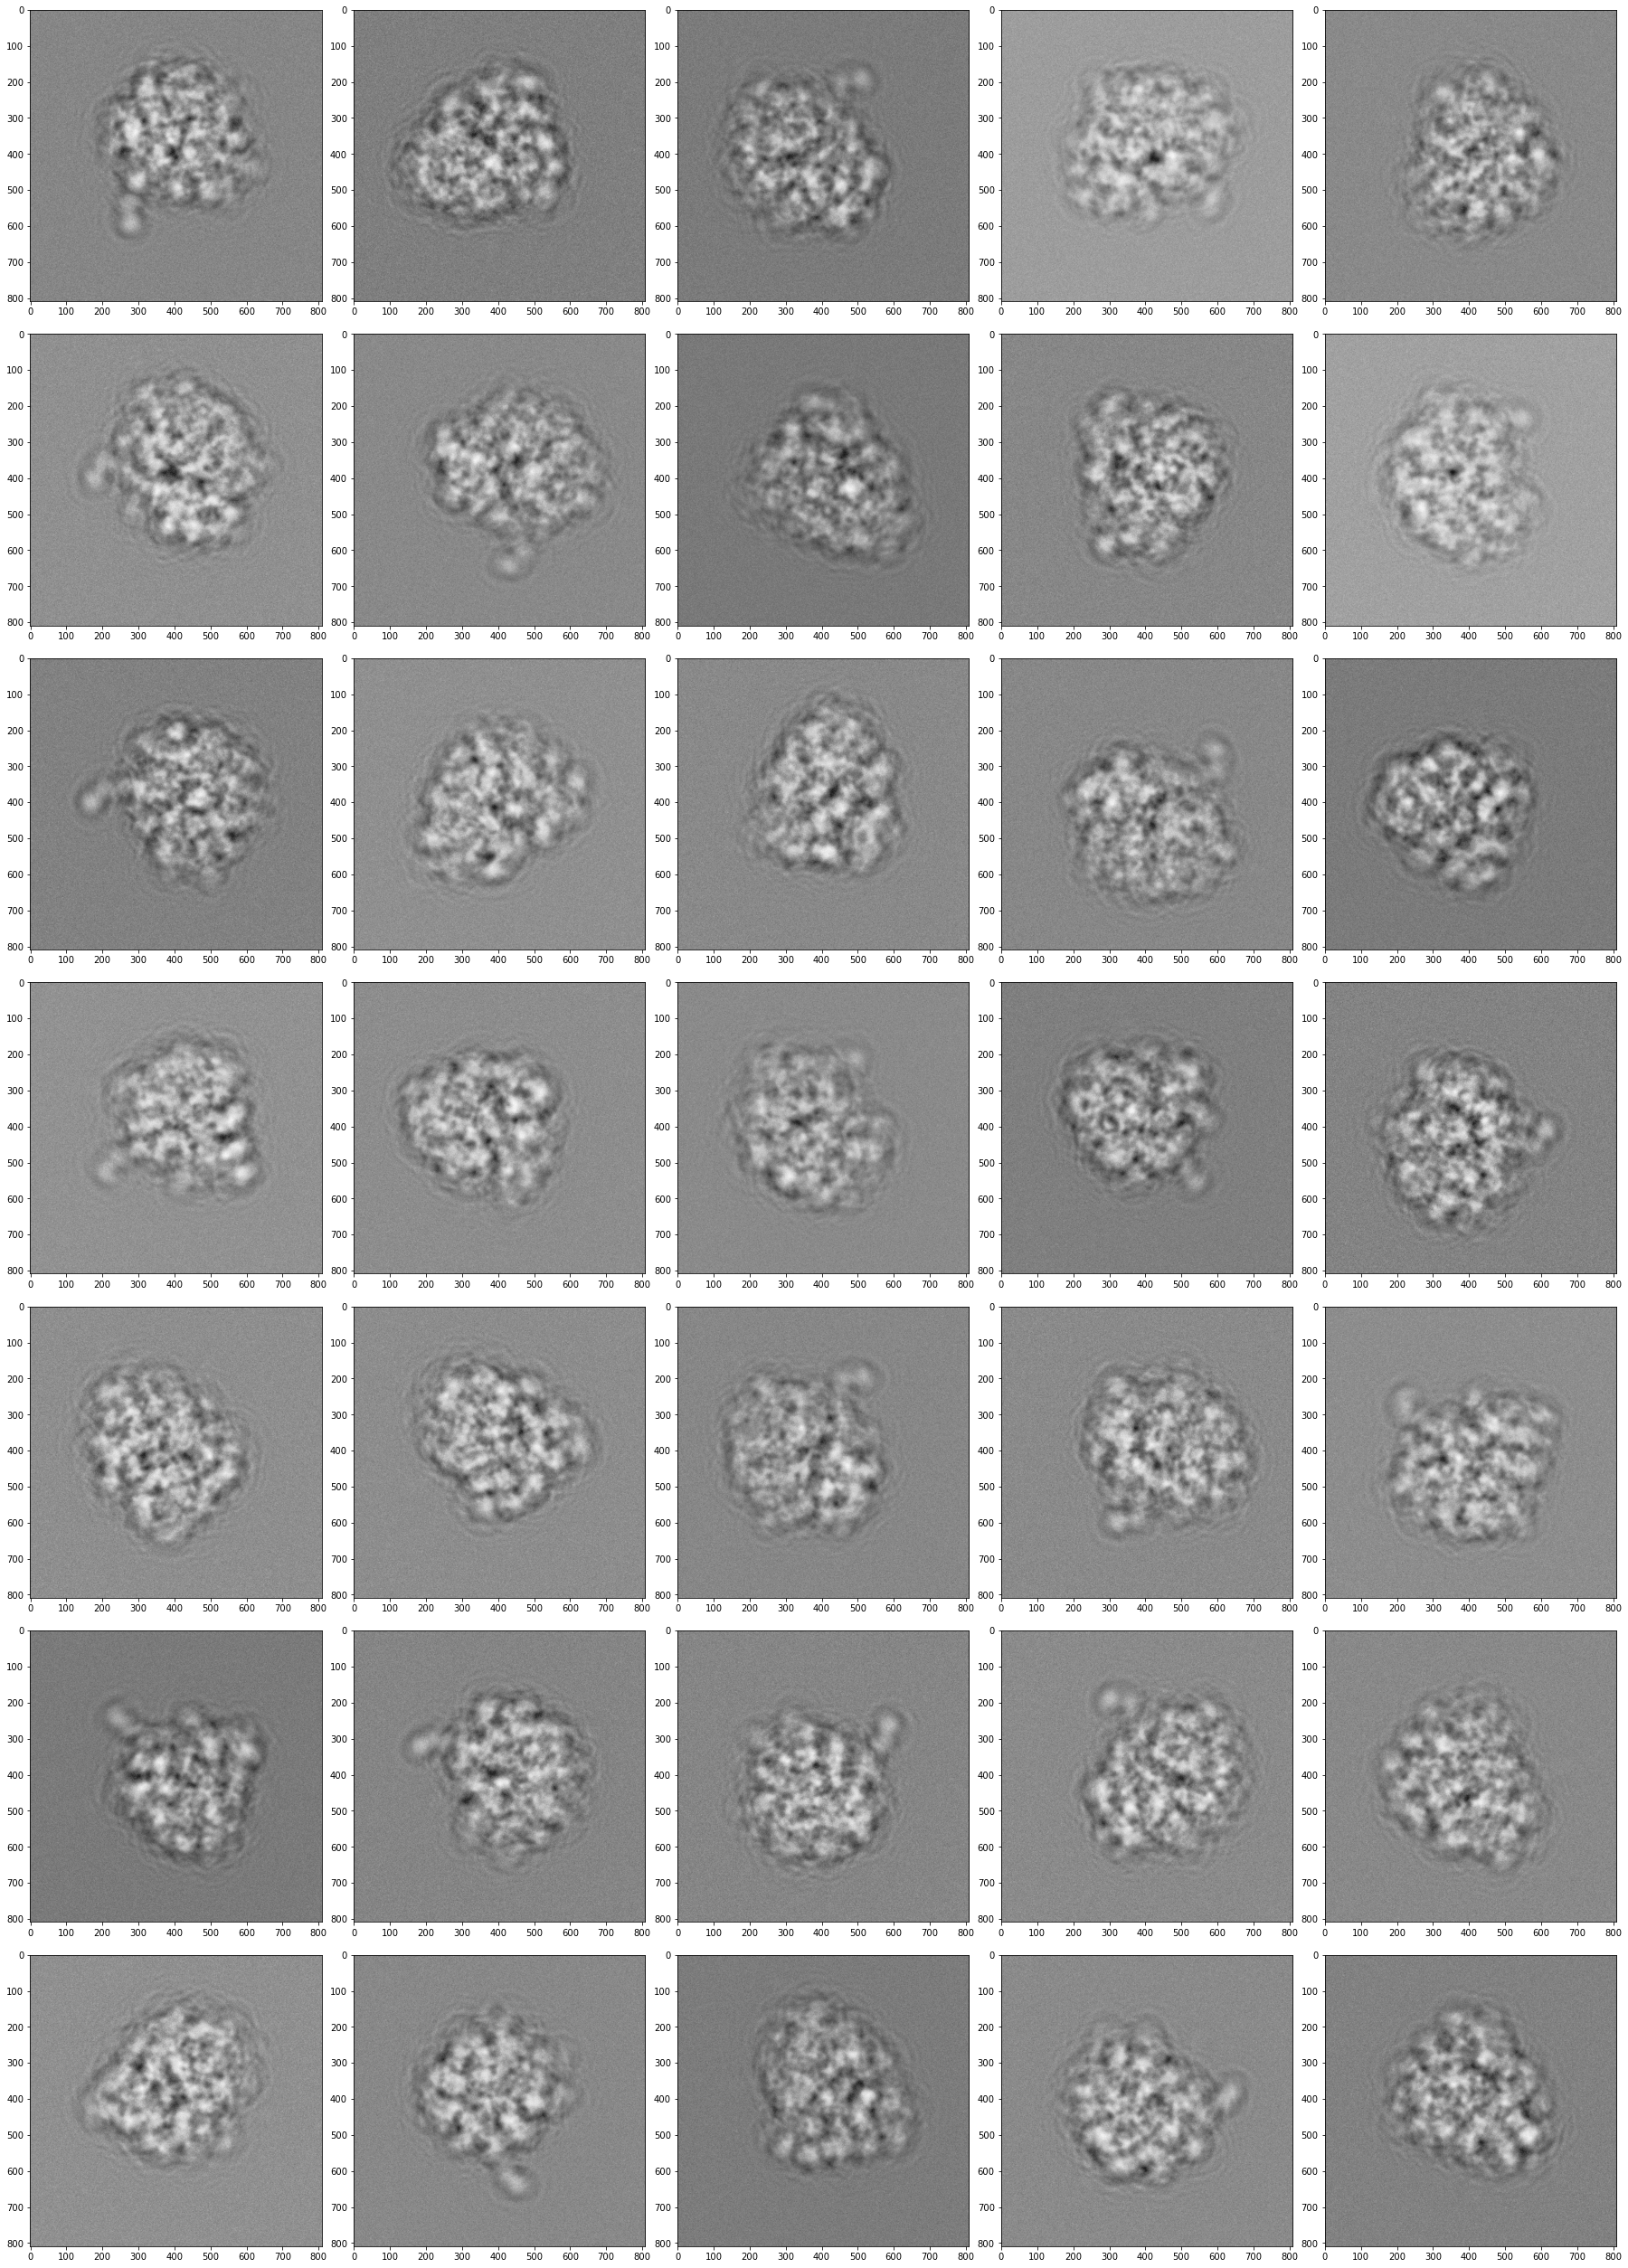

In [20]:
view_particles(particle_stack[0])

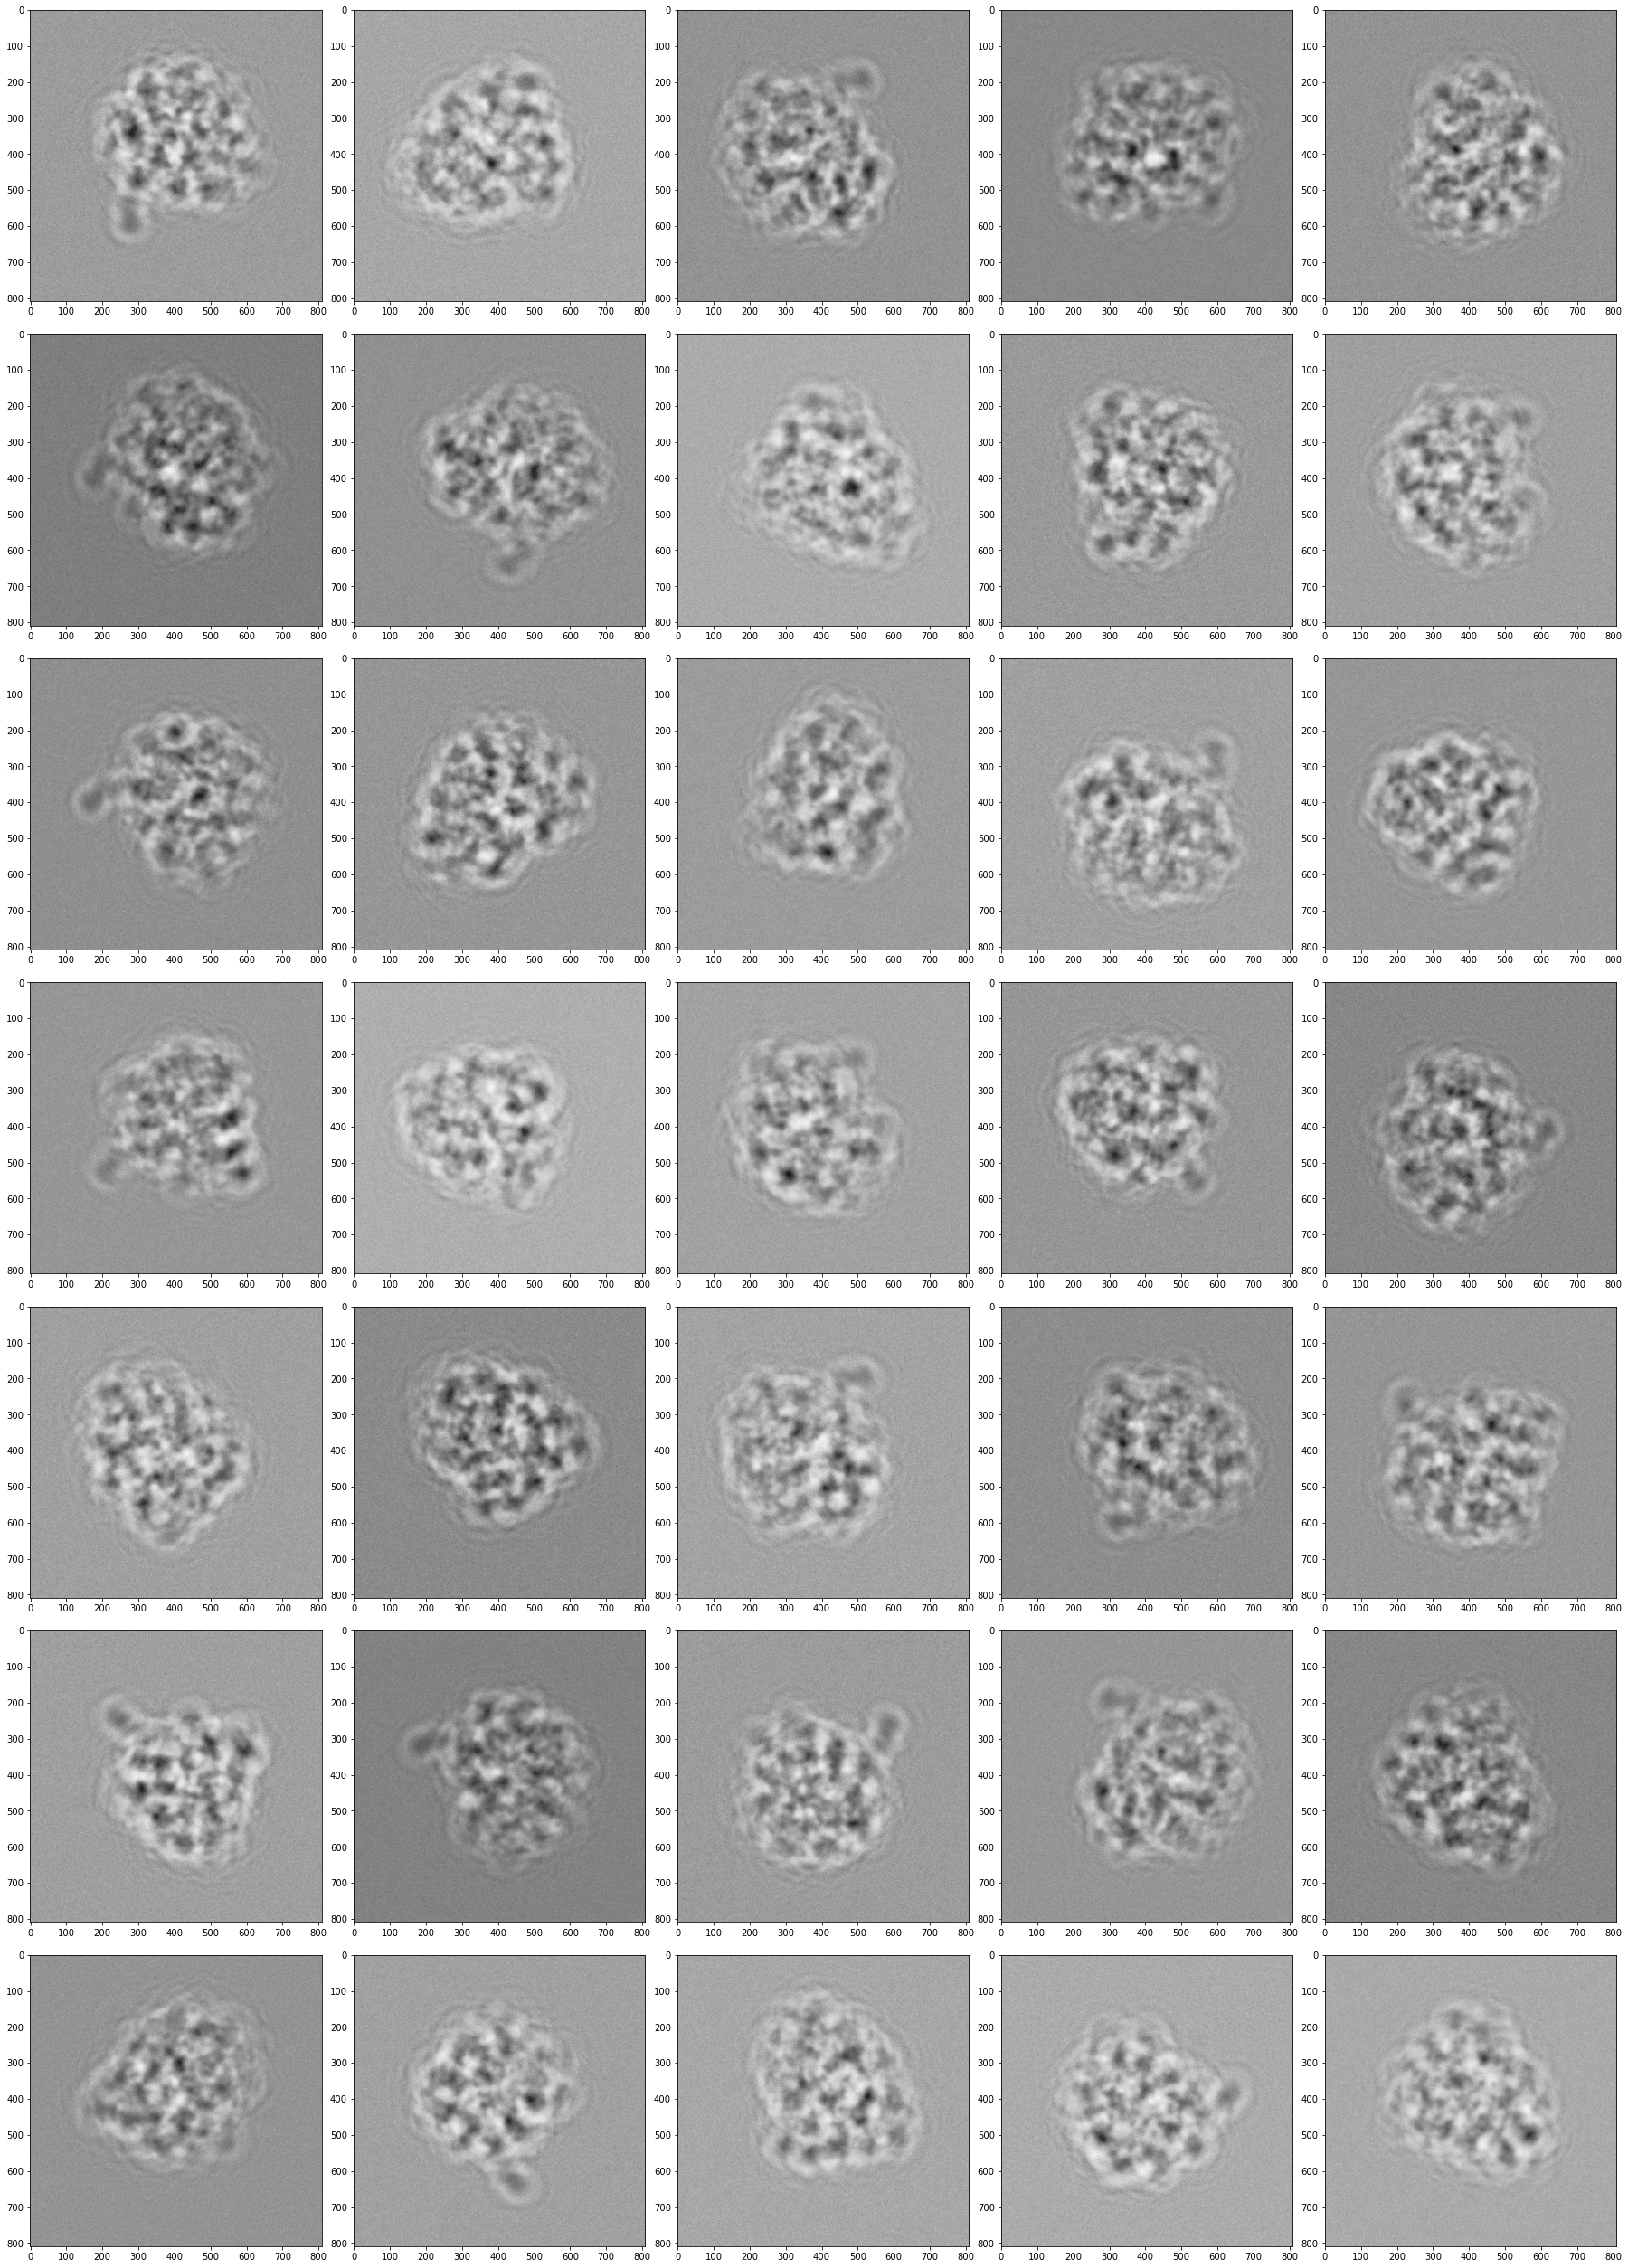

In [23]:
view_particles(particle_stack[1])

In [21]:
simulator.export_simulated_data(particle_stack)

('simSPI/temp_workspace/output/4v6x_randomrot.h5',
 'simSPI/temp_workspace/output/4v6x_randomrot.star')

### Outputs
See output directory as you defined in `path_config.yaml`.
- `.h5` file : Creation of 2D particle stack from input .pdb structure
- `.star` file : Metadata associated with generated stack for reproduction
    - Specifies detector input parameters as defined by user in configuration `.yaml`'s
    - Generated parameters seeded by user inputs